In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import joblib

In [6]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.drop('customerID', axis=1,inplace=True)

In [11]:
df.duplicated().sum()

np.int64(22)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [15]:
df.dropna(inplace=True)

In [16]:
df['gender'].value_counts()

,count
gender,
Male,3535
Female,3475


<Axes: xlabel='gender', ylabel='count'>

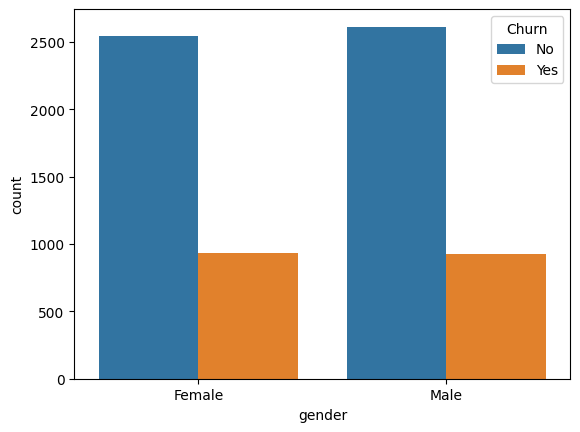

In [17]:
sns.countplot(data=df , x='gender', hue='Churn')

## Gender feature doesn't show a meaningful impact on churn as both males and females churn at similar rates.


## Gender is not a strong business discriminator and may not heavily influence targeting strategies.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [19]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [20]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5869
1,1141


<Axes: xlabel='SeniorCitizen', ylabel='count'>

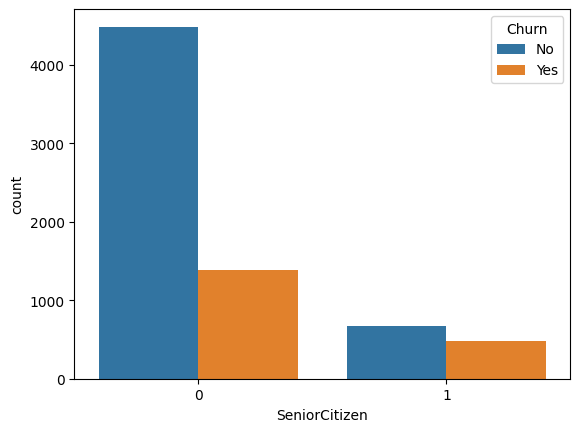

In [21]:
sns.countplot(data=df , x='SeniorCitizen', hue='Churn' )

## Senior citizens show a significantly higher churn rate compared to non-senior customers.

## Older customers may be more price-sensitive or less satisfied with service flexibility.

## This feature is likely to be important in predictive modeling.

In [22]:
df['Partner'].value_counts()

,count
Partner,
No,3617
Yes,3393


<Axes: xlabel='Partner', ylabel='count'>

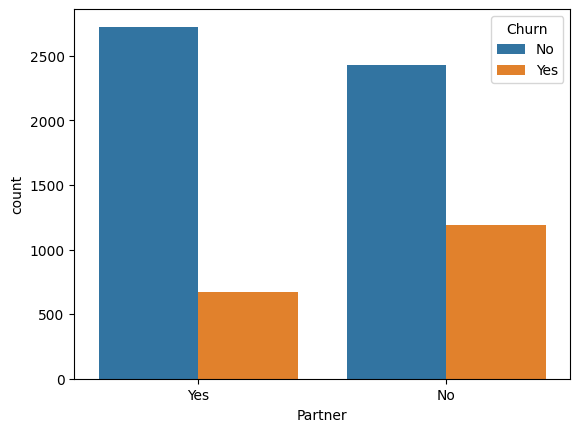

In [23]:
sns.countplot(data=df , x='Partner', hue='Churn')

## people with no partener is more likely to be churn than the people who are in relationship ( they're more stable) .

## This may indicate stronger long-term commitment among partnered customers.

In [24]:
df['Dependents'].value_counts()

,count
Dependents,
No,4911
Yes,2099


<Axes: xlabel='Dependents', ylabel='count'>

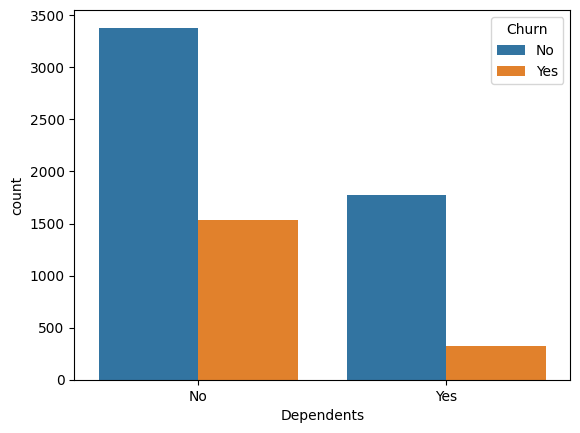

In [25]:
sns.countplot(data=df , x='Dependents', hue='Churn')

## Customers without dependents are much more likely to churn.
## The users who have dependents tend to be more stable in changing their provider .
## Indicates an opportunity for retention offers targeted at single customers.

In [26]:
df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6330
No,680


<Axes: xlabel='PhoneService', ylabel='count'>

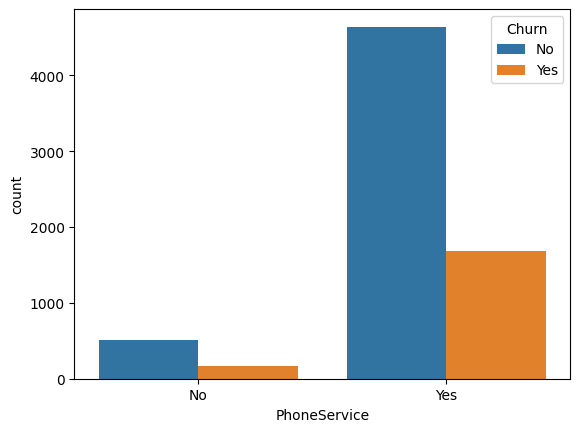

In [27]:
sns.countplot(data=df , x='PhoneService', hue='Churn')

## Phone service availability alone has no strong impact on churn rate.
## Customers with and without phone service display similar churn behavior.

In [28]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3363
Yes,2967
No phone service,680


<Axes: xlabel='MultipleLines', ylabel='count'>

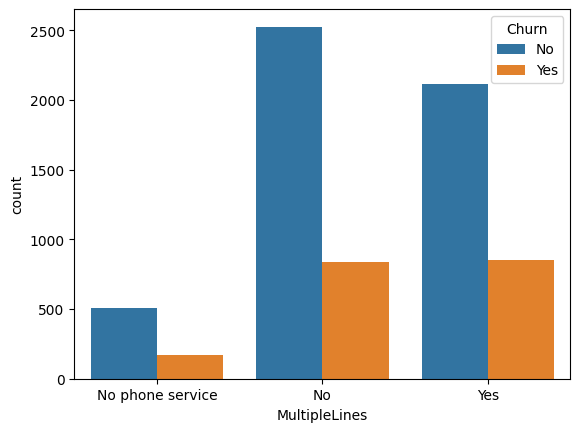

In [29]:
sns.countplot(data=df , x='MultipleLines', hue='Churn')

This feature almost doesn't affect the churn rate . It won't have an impact on our predictive model.

In [30]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3090
DSL,2414
No,1506


<Axes: xlabel='InternetService', ylabel='count'>

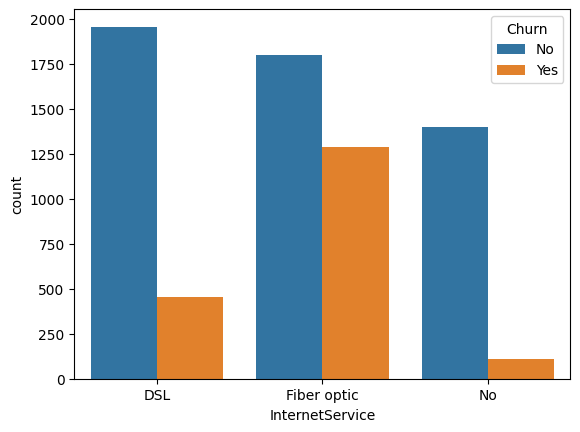

In [31]:
sns.countplot(data=df , x='InternetService', hue='Churn')

## customers who use fiber optic internet service are more likely to churn among the other groups.
## No-internet customers have very low churn (logical: fewer services = fewer issues).
## Indicates dissatisfaction with fiber-optic service quality, pricing, or installation experience.

In [32]:
df['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3489
Yes,2015
No internet service,1506


<Axes: xlabel='OnlineSecurity', ylabel='count'>

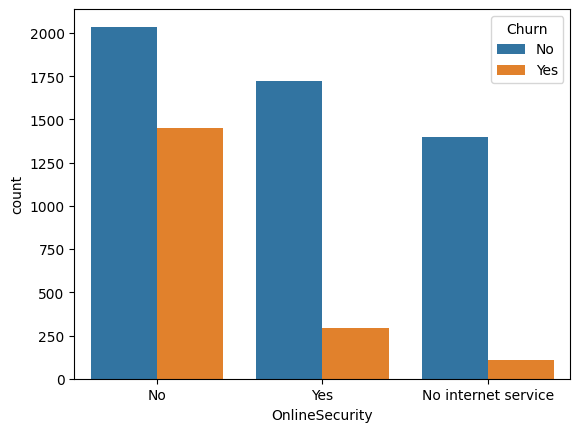

In [33]:
sns.countplot(data=df , x='OnlineSecurity', hue='Churn')

## Users who don't have online security have a high rate of churn among the other groups.
## Users with no internet service have the lowest number of churn rate (logical: fewer services = fewer issues).
## Additional security services are linked to higher customer stickiness.
## This is a strong retention-leading feature and highly predictive.
## Try to encourage users for online security service.

In [34]:
df['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3079
Yes,2425
No internet service,1506


<Axes: xlabel='OnlineBackup', ylabel='count'>

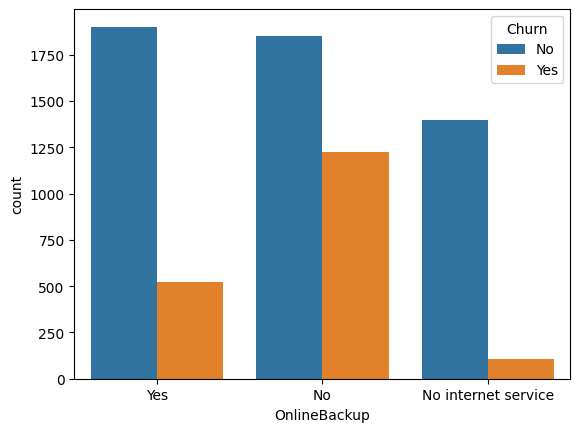

In [35]:
sns.countplot(data=df , x='OnlineBackup', hue='Churn')

## Users with no backup have a high rate of churn .
## Customers with backup services appear more “locked in” and remain longer.
## Indicates that add-on services act as retention anchors.

In [36]:
df['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3086
Yes,2418
No internet service,1506


<Axes: xlabel='DeviceProtection', ylabel='count'>

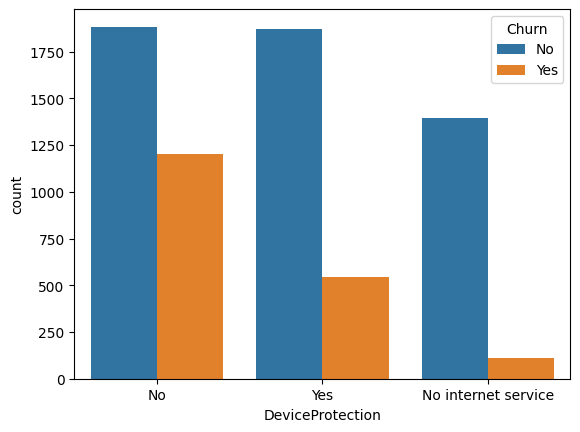

In [37]:
sns.countplot(data=df , x='DeviceProtection', hue='Churn')

## The analysis of this feature is the same as online backup and online security feature.

In [38]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,3464
Yes,2040
No internet service,1506


<Axes: xlabel='TechSupport', ylabel='count'>

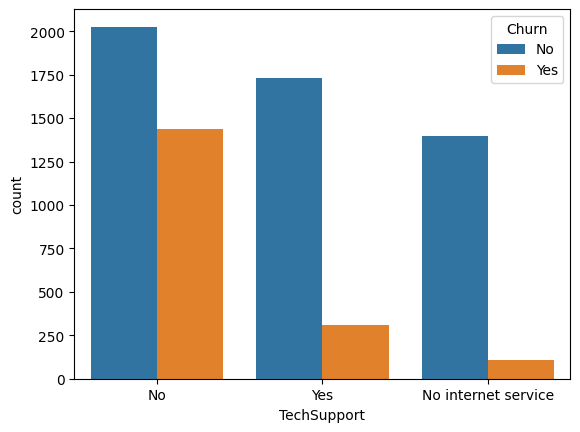

In [39]:
sns.countplot(data=df , x='TechSupport', hue='Churn')

## The TechSupport feature shows a clear relationship with churn. Customers without technical support are more likely to churn, while those with TechSupport exhibit significantly higher retention. This suggests that improving or promoting technical support services could reduce customer churn.

In [40]:
df['StreamingTV'].value_counts()

,count
StreamingTV,
No,2801
Yes,2703
No internet service,1506


<Axes: xlabel='StreamingTV', ylabel='count'>

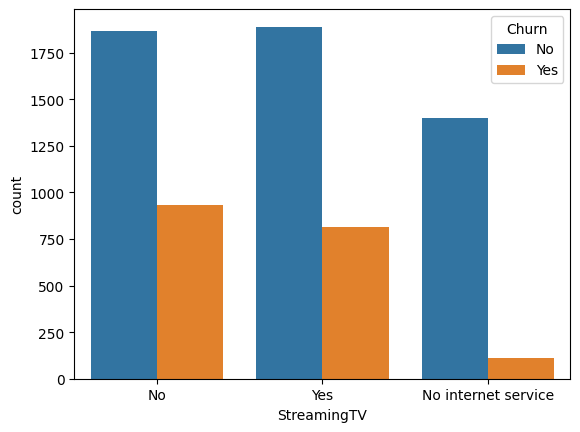

In [41]:
sns.countplot(data=df , x='StreamingTV', hue='Churn')

## Customers with StreamingTV show slightly higher churn, but the difference is not as large as InternetService.
## This may indicate that streaming services are optional add-ons and don’t strongly influence customer loyalty.

In [42]:
df['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2773
Yes,2731
No internet service,1506


<Axes: xlabel='StreamingMovies', ylabel='count'>

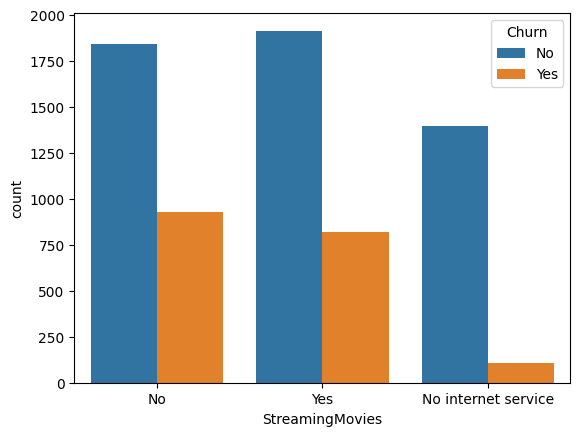

In [43]:
sns.countplot(data=df , x='StreamingMovies', hue='Churn')

## This feature analysis is the same as StreamingTV.

In [44]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3853
Two year,1685
One year,1472


<Axes: xlabel='Contract', ylabel='count'>

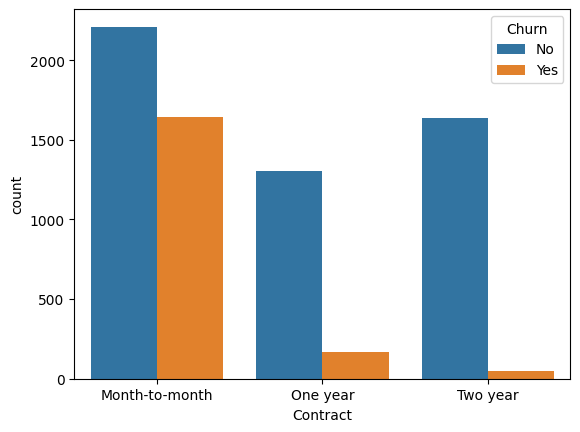

In [45]:
sns.countplot(data=df , x='Contract', hue='Churn')

## The rate of churn with  month - to - month is very high . Users tend to leave the provider.
## It's suggested to send some offers to the users of month - to - month contract to keep them .
## one and two year contract has less rate of churn , thus the stability with these users is higher.

In [46]:
df['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4158
No,2852


<Axes: xlabel='PaperlessBilling', ylabel='count'>

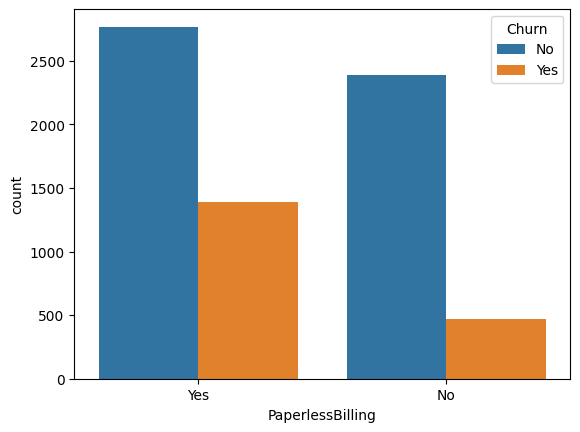

In [47]:
sns.countplot(data=df , x='PaperlessBilling', hue='Churn')

## This may indicate that streaming services are optional add-ons and don’t strongly influence customer loyalty.
## This might be due to:


*   Younger customers adopting paperless billing (and younger people churn more).
*   Electronic payment methods being more correlated with churn.



In [48]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2359
Mailed check,1588
Bank transfer (automatic),1542
Credit card (automatic),1521


<Axes: xlabel='PaymentMethod', ylabel='count'>

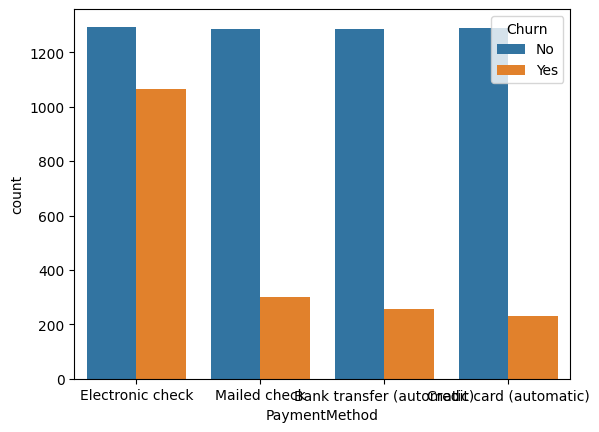

In [49]:
sns.countplot(data=df , x='PaymentMethod', hue='Churn')

## The rate of churn with the people who are paying with electronic check is large.
## The other group are approximitaly similar.
##

In [50]:
df['Churn'].value_counts()

,count
Churn,
No,5153
Yes,1857


/tmp/ipython-input-1599691757.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['tenure'])


<Axes: ylabel='Density'>

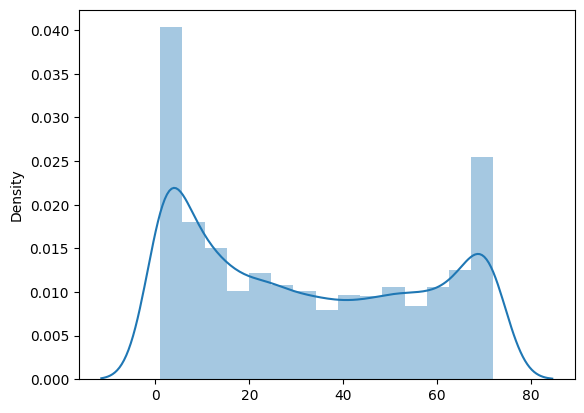

In [51]:
sns.distplot(x=df['tenure'])

/tmp/ipython-input-916464130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['MonthlyCharges'])


<Axes: ylabel='Density'>

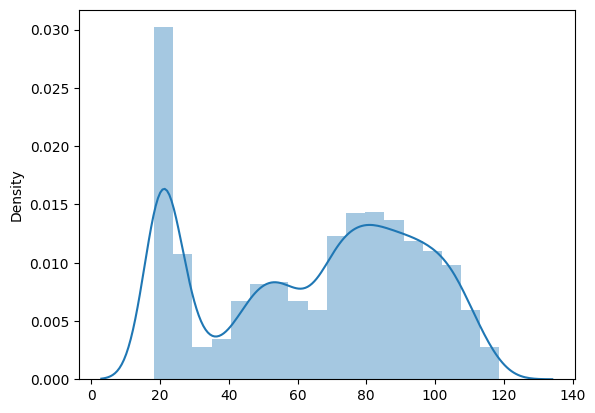

In [52]:
sns.distplot(x=df['MonthlyCharges'])

/tmp/ipython-input-3914035135.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])


<Axes: xlabel='TotalCharges', ylabel='Density'>

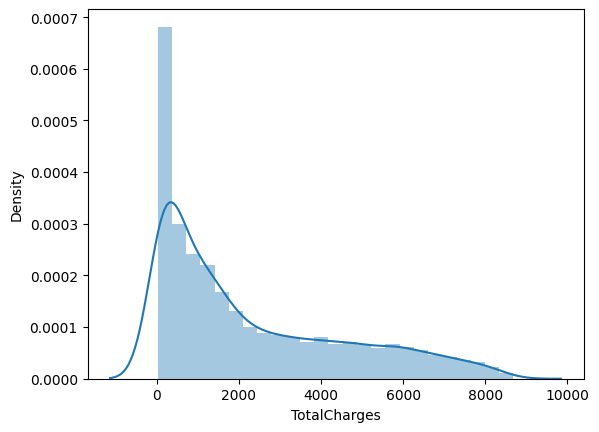

In [53]:
sns.distplot(df['TotalCharges'])

In [54]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

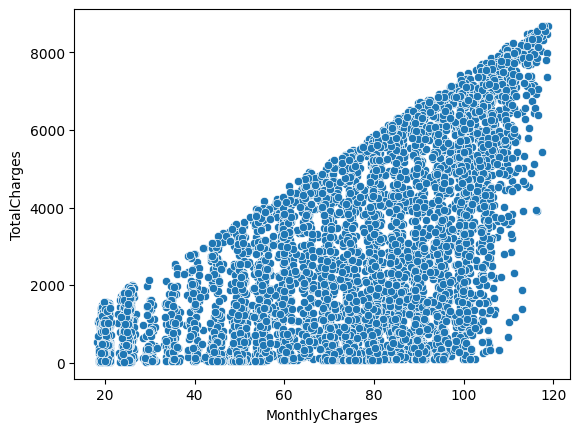

In [55]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',data=df )

## sshs

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

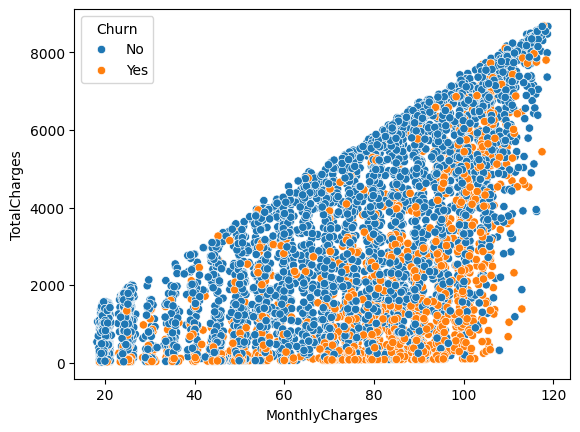

In [56]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',data=df , hue='Churn')

## The relationship between the MonthlyCharges and TotalCharges is proportional .

In [57]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

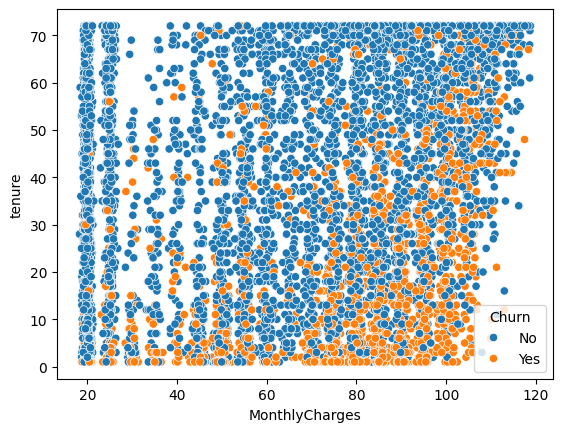

In [58]:
sns.scatterplot(x='MonthlyCharges', y='tenure',data=df , hue='Churn')

## As the tenure value increases , the number of churn people decreases .

In [59]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Feature Engineering and Encoding

In [60]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [61]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


## Since the Gender feature doesn't affect the Churn and , Device Protection and Streaming Movies are repetitive to another features . So these three features won't be used with encoding.

In [62]:
df=df.drop(['gender','DeviceProtection','StreamingMovies'], axis=1)

In [63]:
x = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges' ]]

In [64]:
x_encoded=pd.get_dummies(x , dtype=int)
y=df['Churn']
x_train , x_test , y_train , y_test = train_test_split(x_encoded,y,test_size=0.2 , random_state=42 , stratify=y)

In [65]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Scaling Data

In [67]:
scaler = StandardScaler()

In [68]:
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled= scaler.transform(x_test)

## Model Selection & Evaluation

In [70]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Decision Tree": DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier(n_estimators=300),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.9,
        eval_metric="logloss"
    ),
    "SVM": SVC(probability=True, class_weight='balanced')
}

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluate_model(model, x_train_scaled, y_train_resampled, x_test_scaled, y_test):
    model.fit(x_train_scaled, y_train_resampled)
    preds = model.predict(x_test_scaled)
    probs = model.predict_proba(x_test_scaled)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-score": f1_score(y_test, preds),
        "ROC-AUC": roc_auc_score(y_test, probs)
    }

In [73]:
results = {}

for name, model in models.items():
    print("Training:", name)
    results[name] = evaluate_model(model, x_train_scaled, y_train_resampled, x_test_scaled, y_test)

Training: Logistic Regression
Training: Decision Tree
Training: Random Forest
Training: XGBoost
Training: SVM


In [74]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Logistic Regression,0.803138,0.641791,0.579515,0.609065,0.845485
Decision Tree,0.731098,0.492063,0.501348,0.496662,0.658414
Random Forest,0.779601,0.600649,0.498652,0.544919,0.811374
XGBoost,0.779601,0.594512,0.525606,0.557940,0.826397
SVM,0.799572,0.640625,0.552561,0.593343,0.795659


### Based on the evaluation metrics, Logistic Regression provides the best overall performance.


## Logistic Regression offers:
#### • The highest ROC-AUC (0.845), indicating strong ability to separate churn vs non-churn.
#### • The best F1-score (0.609), reflecting a good balance between precision and recall.
#### • The highest accuracy (0.80), with a competitive recall (0.579).

### Therefore, Logistic Regression is selected as the final model because it provides the best trade-off between performance, stability, and interpretability.


## Working with Logistic Regression model

In [75]:
LR_model = LogisticRegression()

In [77]:
LR_model.fit(x_train_scaled, y_train_resampled)
preds = LR_model.predict(x_test_scaled)
probs = LR_model.predict_proba(x_test_scaled)[:, 1]

In [78]:
accuracy  = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall    = recall_score(y_test, preds)
f1        = f1_score(y_test, preds)
roc_auc   = roc_auc_score(y_test, probs)

In [79]:
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("ROC AUC  :", roc_auc)

print("\nClassification Report:\n")
print(classification_report(y_test, preds))

Accuracy : 0.8031383737517832
Precision: 0.6417910447761194
Recall   : 0.5795148247978437
F1 Score : 0.6090651558073654
ROC AUC  : 0.8454853712800751

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1031
           1       0.64      0.58      0.61       371

    accuracy                           0.80      1402
   macro avg       0.75      0.73      0.74      1402
weighted avg       0.80      0.80      0.80      1402



In [80]:
coefficients = LR_model.coef_[0]

In [81]:
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients,
    'Importance': np.abs(coefficients)
})

In [92]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance

,Feature,Coefficient,Importance
15,InternetService_Fiber optic,0.027925,0.027925
1,MonthlyCharges,0.056173,0.056173
10,PhoneService_Yes,-0.195965,0.195965
14,InternetService_DSL,-0.271066,0.271066
9,PhoneService_No,-0.315835,0.315835
12,MultipleLines_No phone service,-0.315835,0.315835
29,Contract_Month-to-month,-0.596022,0.596022
30,Contract_One year,-0.705049,0.705049
27,StreamingTV_No internet service,-0.729451,0.729451
24,TechSupport_No internet service,-0.729451,0.729451


The feature importance analysis showed that tenure, payment method (especially electronic check), paperless billing, total charges, and the absence of support/security services were the strongest predictors of churn. Low-tenure customers and those paying through electronic check demonstrated the highest churn risk. Additionally, customers with fewer added services (Tech Support, Online Security, Backup) and those without dependents showed significantly higher churn tendencies. This allowed us to understand customer behavior and identify actionable churn-driving factors.

## Deployment

In [83]:
import joblib

joblib.dump(LR_model, 'my_model.pkl')

model = joblib.load('my_model.pkl')


In [84]:
feature_columns = x_train.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

['feature_columns.pkl']

In [85]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [86]:
joblib.dump(le, "target_encoder.pkl")

['target_encoder.pkl']

In [88]:
model = joblib.load("my_model.pkl")
feature_columns = joblib.load("feature_columns.pkl")

In [89]:
target_encoder = joblib.load("target_encoder.pkl")  # to decode predictions

In [90]:
def predict_gradio(SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges):
    input_df = pd.DataFrame({
        "SeniorCitizen": [SeniorCitizen],
        "Partner": [Partner],
        "Dependents": [Dependents],
        "tenure": [tenure],
        "PhoneService": [PhoneService],
        'MultipleLines':[MultipleLines],
        'InternetService':[InternetService],
        'OnlineSecurity':[OnlineSecurity],
        'OnlineBackup':[OnlineBackup],
        'TechSupport':[TechSupport],
        'StreamingTV':[StreamingTV],
        'Contract':[Contract],
        'PaperlessBilling':[PaperlessBilling],
        'PaymentMethod':[PaymentMethod],
        'MonthlyCharges':[MonthlyCharges],
        'TotalCharges':[TotalCharges]
    })
    input_encoded = pd.get_dummies(input_df)
    for col in feature_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[feature_columns]
    pred_encoded = model.predict(input_encoded)
    pred = target_encoder.inverse_transform(pred_encoded) if target_encoder else pred_encoded

    return pred[0]


In [91]:
import gradio as gr

inputs = [
    gr.Dropdown(choices=[0, 1], label="SeniorCitizen",value=None),
    gr.Dropdown(choices=['Yes', 'No'], label="Partner",value=None),
    gr.Dropdown(choices=['No', 'Yes'], label="Dependents",value=None),
    gr.Number(label="Tenure"),
    gr.Dropdown(choices=['No', 'Yes'], label="PhoneService",value=None),
    gr.Dropdown(choices=['No phone service', 'No', 'Yes'], label="MultipleLines",value=None),
    gr.Dropdown(choices=['DSL', 'Fiber optic', 'No'], label="InternetService",value=None),
    gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="OnlineSecurity",value=None),
    gr.Dropdown(choices=['Yes', 'No', 'No internet service'], label="OnlineBackup",value=None),
    gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="TechSupport",value=None),
    gr.Dropdown(choices=['No', 'Yes', 'No internet service'], label="StreamingTV",value=None),
    gr.Dropdown(choices=['Month-to-month', 'One year', 'Two year'], label="Contract",value=None),
    gr.Dropdown(choices=['Yes', 'No'], label="PaperlessBilling",value=None),
    gr.Dropdown(choices=['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'], label="PaymentMethod",value=None),
    gr.Number(label="MonthlyCharges"),
    gr.Number(label="TotalCharges")
]

demo = gr.Interface(fn=predict_gradio, inputs=inputs, outputs="text", title="Churn Predictor")
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://753491b7427fe2a1a5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
